# Digital Musicology Project: Statistical Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data00 = pd.read_csv("output.csv", sep=',', index_col=0)
data01= pd.read_csv("output2.csv", sep=',', index_col=0)
data=data00.join(data01)
data01

,Mother tongue,NoLyricsLike,ForeignLike,FamiliarLike,ActiveEngagement,PerceptualAbilities,MusicalTraining,SingingAbilities,Emotions,MusicSoph,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Timestamp,,,,,,,,,,,,,,,
0,French,1,1,1,51,52,29,12,41,67,79,92,79,76,66
1,French,6,4,4,56,58,45,41,33,111,44,38,85,42,79
2,Spanish,4,1,7,37,43,24,31,31,79,34,79,85,69,24
3,Persian,2,1,5,36,53,27,42,27,86,62,85,66,76,50
4,Spanish,5,7,3,45,38,18,32,39,83,73,95,79,60,79
5,French,5,3,5,50,53,25,26,35,71,46,73,66,52,85
6,French,4,5,3,46,55,34,32,36,91,28,73,73,85,16
7,French,2,5,6,51,54,39,32,37,96,52,24,79,60,16
8,French,5,4,5,55,55,40,35,41,102,66,34,88,85,52


In [3]:
data.shape

(30, 35)

In [4]:
data['NOL'] = data.apply(lambda row: (row.NOL1 + row.NOL2+ row.NOL3)/3, axis=1)
data['FAM'] = data.apply(lambda row: (row.FAM1 + row.FAM2+ row.FAM3)/3, axis=1)
data['FOR'] = data.apply(lambda row: (row.FOR1 + row.FOR2+ row.FOR3)/3, axis=1)
data.head()

,FAM1,FAM2,FAM3,FOR1,FOR2,FOR3,NOL1,NOL2,NOL3,NOMUSIC,...,Emotions,MusicSoph,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,NOL,FAM,FOR
Timestamp,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,7.0,4.0,7.0,5.0,4.0,4.0,6.0,3.0,...,41,67,79,92,79,76,66,4.666667,4.333333,5.333333
1,6.0,2.0,1.0,3.0,4.0,4.0,1.0,5.0,5.0,7.0,...,33,111,44,38,85,42,79,3.666667,3.000000,3.666667
2,8.0,6.0,5.0,4.0,2.0,5.0,4.0,3.0,5.0,8.0,...,31,79,34,79,85,69,24,4.000000,6.333333,3.666667
3,8.0,4.0,10.0,6.0,7.0,7.0,5.0,4.0,3.0,6.0,...,27,86,62,85,66,76,50,4.000000,7.333333,6.666667
4,7.0,6.0,2.0,6.0,6.0,4.0,6.0,4.0,7.0,5.0,...,39,83,73,95,79,60,79,5.666667,5.000000,5.333333


In [5]:
data['pNOL'] = data.apply(lambda row: (row.NOL/(row.NOL + row.FAM+ row.FOR)), axis=1)
data['pFAM'] = data.apply(lambda row: (row.FAM/(row.NOL + row.FAM+ row.FOR)), axis=1)
data['pFOR'] = data.apply(lambda row: (row.FOR/(row.NOL + row.FAM+ row.FOR)), axis=1)
data

,FAM1,FAM2,FAM3,FOR1,FOR2,FOR3,NOL1,NOL2,NOL3,NOMUSIC,...,Conscientiousness,Extraversion,Agreeableness,Neuroticism,NOL,FAM,FOR,pNOL,pFAM,pFOR
Timestamp,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,7.0,4.0,7.0,5.0,4.0,4.0,6.0,3.0,...,92,79,76,66,4.666667,4.333333,5.333333,0.325581,0.302326,0.372093
1,6.0,2.0,1.0,3.0,4.0,4.0,1.0,5.0,5.0,7.0,...,38,85,42,79,3.666667,3.000000,3.666667,0.354839,0.290323,0.354839
2,8.0,6.0,5.0,4.0,2.0,5.0,4.0,3.0,5.0,8.0,...,79,85,69,24,4.000000,6.333333,3.666667,0.285714,0.452381,0.261905
3,8.0,4.0,10.0,6.0,7.0,7.0,5.0,4.0,3.0,6.0,...,85,66,76,50,4.000000,7.333333,6.666667,0.222222,0.407407,0.370370
4,7.0,6.0,2.0,6.0,6.0,4.0,6.0,4.0,7.0,5.0,...,95,79,60,79,5.666667,5.000000,5.333333,0.354167,0.312500,0.333333
5,4.0,4.0,2.0,5.0,8.0,3.0,6.0,6.0,1.0,4.0,...,73,66,52,85,4.333333,3.333333,5.333333,0.333333,0.256410,0.410256
6,2.0,4.0,1.0,4.0,0.0,1.0,2.0,1.0,1.0,3.0,...,73,73,85,16,1.333333,2.333333,1.666667,0.250000,0.437500,0.312500
7,2.0,0.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,4.0,...,24,79,60,16,1.666667,1.000000,1.666667,0.384615,0.230769,0.384615
8,7.0,5.0,4.0,3.0,6.0,2.0,6.0,2.0,5.0,5.0,...,34,88,85,52,4.333333,5.333333,3.666667,0.325000,0.400000,0.275000


## Part 1: Music valence

In [7]:
music_valenceNOL = pd.concat((data['NoLyricsLike'],data['NOL']), axis=1)
music_valenceNOL
music_valenceNOL.corr(method='pearson', min_periods=1)

,NoLyricsLike,NOL
NoLyricsLike,1.000000,-0.115074
NOL,-0.115074,1.000000


In [8]:
music_valenceFAM = pd.concat((data['FamiliarLike'],data['FAM']), axis=1)
music_valenceFAM
music_valenceFAM.corr(method='pearson', min_periods=1)

,FamiliarLike,FAM
FamiliarLike,1.000000,0.130809
FAM,0.130809,1.000000


In [9]:
music_valenceFOR = pd.concat((data['ForeignLike'],data['FOR']), axis=1)
music_valenceFOR
music_valenceFOR.corr(method='pearson', min_periods=1)

,ForeignLike,FOR
ForeignLike,1.000000,-0.269316
FOR,-0.269316,1.000000


In [10]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
like_Song = pd.concat((data['NoLyricsLike'], data['FamiliarLike'], data['ForeignLike']), axis=0)
like_Song = pd.DataFrame(like_Song, columns=['Valence'])
language = pd.concat((data['Mother tongue'],data['Mother tongue'],data['Mother tongue']), axis=0)
language = pd.DataFrame(language, columns=['Mother tongue'])
music_valenceTongue = pd.concat((prop_Accidents,like_Song,language), axis=1)
music_valenceTongue = pd.DataFrame(music_valenceTongue)

In [11]:
music_valenceSPA = music_valenceTongue.loc[music_valenceTongue["Mother tongue"] == "Spanish"]
music_valenceSPA.corr(method='pearson', min_periods=1)

,Accidents,Valence
Accidents,1.000000,0.274111
Valence,0.274111,1.000000


In [12]:
music_valenceFRE = music_valenceTongue.loc[music_valenceTongue["Mother tongue"] == "French"]
music_valenceFRE.corr(method='pearson', min_periods=1)

,Accidents,Valence
Accidents,1.000000,-0.163677
Valence,-0.163677,1.000000


In [13]:
music_valencePER = music_valenceTongue.loc[music_valenceTongue["Mother tongue"] == "Persian"]
music_valencePER.corr(method='pearson', min_periods=1)

,Accidents,Valence
Accidents,1.000000,0.241105
Valence,0.241105,1.000000


In [14]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
like_Song = pd.concat((data['NoLyricsLike'], data['FamiliarLike'], data['ForeignLike']), axis=0)
like_Song = pd.DataFrame(like_Song, columns=['Valence'])
music_valence1 = pd.concat((prop_Accidents,like_Song), axis=1)
music_valence1
music_valence1.corr(method='pearson', min_periods=1)

,Accidents,Valence
Accidents,1.000000,0.128391
Valence,0.128391,1.000000


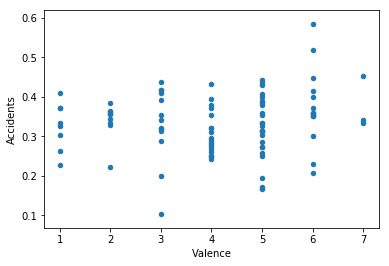

In [15]:
scatterplot_propAccidents = music_valence1.plot.scatter(x='Valence', y='Accidents')
scatterplot_propAccidents.get_figure().savefig('Valence_Accidents.jpg', format='jpg')

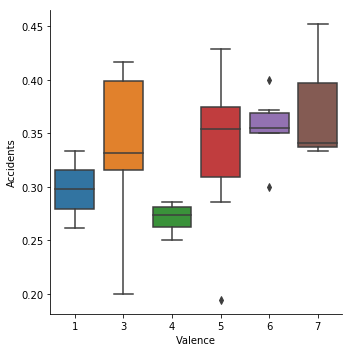

In [16]:
sns.factorplot(
    x      = 'Valence',
    y      = 'Accidents',
    data   = music_valenceSPA,
    kind   = "box",
    size   = 5,
    aspect = 1
)
plt.savefig('Valence_propAccidents_SPA.pdf')

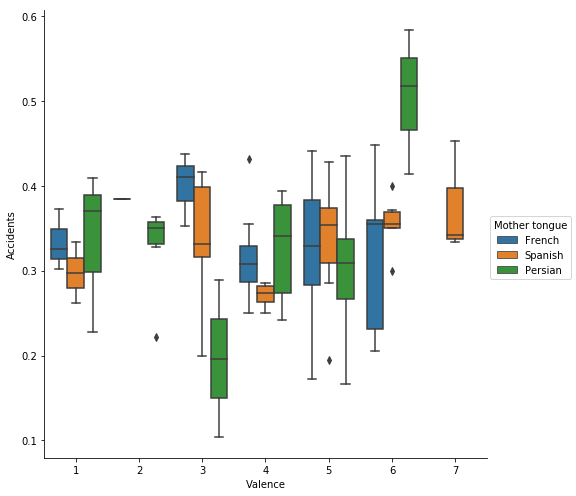

In [17]:
language = pd.concat((data['Mother tongue'],data['Mother tongue'],data['Mother tongue']), axis=0)
language = pd.DataFrame(language, columns=['Mother tongue'])
music_valence01 = pd.concat((music_valence1,language), axis=1)
music_valence01
sns.factorplot(
    x      = 'Valence',
    y      = 'Accidents',
    data   = music_valence01,
    hue    = 'Mother tongue',
    kind   = "box",
    size   = 7,
    aspect = 1
)
plt.savefig('Valence_Accidents_byLanguage.pdf')

In [18]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
like_Song = pd.concat((data['NoLyricsLike'], data['FamiliarLike'], data['ForeignLike']), axis=0)
like_Song = pd.DataFrame(like_Song, columns=['Valence'])
music_valence2 = pd.concat((prop_Accidents,like_Song), axis=1)
music_valence2
music_valence2.corr(method='pearson', min_periods=1)

,Accidents,Valence
Accidents,1.000000,0.128391
Valence,0.128391,1.000000


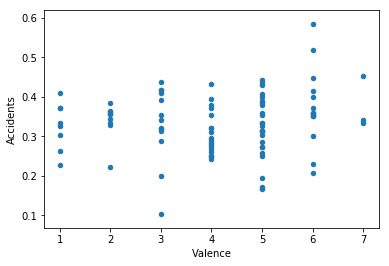

In [19]:
music_valence2=pd.concat((prop_Accidents,like_Song), axis=1)
music_valence2
scatterplot_propAccidents = music_valence2.plot.scatter(x='Valence', y='Accidents')

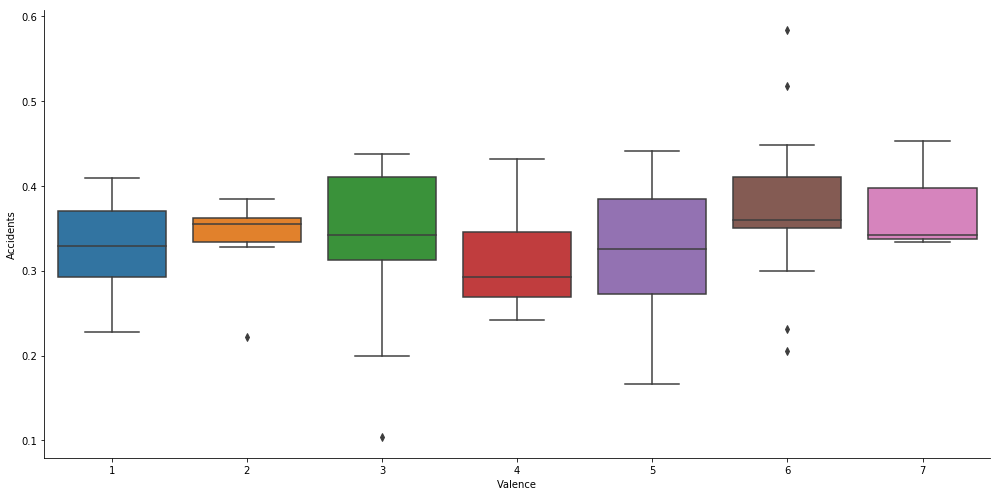

In [20]:
sns.factorplot(
    x      = 'Valence',
    y      = 'Accidents',
    data   = music_valence2,
    kind   = "box",
    size   = 7,
    aspect = 2
)
plt.show()

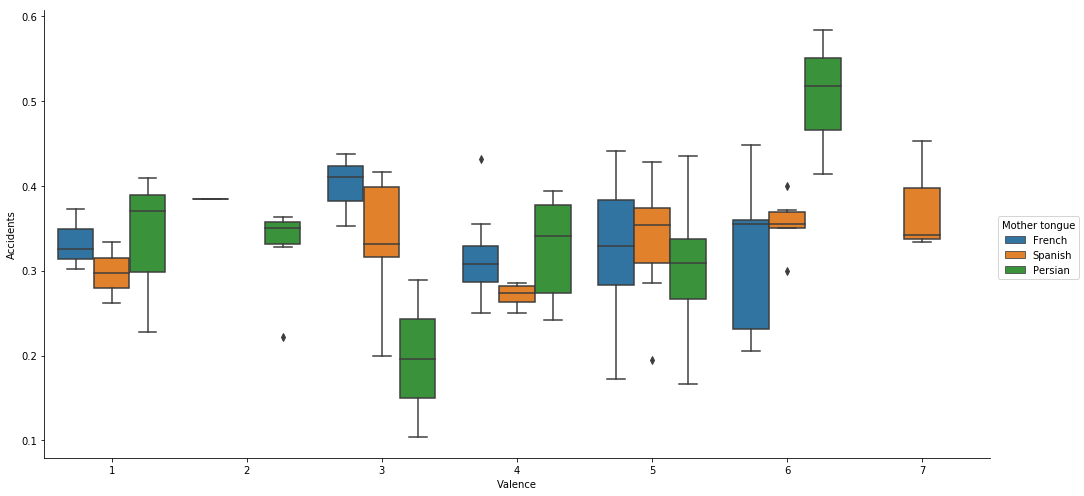

In [21]:
language = pd.concat((data['Mother tongue'],data['Mother tongue'],data['Mother tongue']), axis=0)
language = pd.DataFrame(language, columns=['Mother tongue'])
music_valence02 = pd.concat((music_valence2,language), axis=1)
sns.factorplot(
    x      = 'Valence',
    y      = 'Accidents',
    data   = music_valence02,
    hue    = 'Mother tongue',
    kind   = "box",
    size   = 7,
    aspect = 2
)
plt.show()

## Part 2: Effect of personality in music impact on task performance

In [25]:
data['TOTAL'] = data.apply(lambda row: (row.NOL + row.FAM+ row.FOR), axis=1)

In [26]:
conditions = [
                  (data['Extraversion'] >= 50),
                  (data['Extraversion'] < 50)
]
choices = ['Extroverts','Introverts']
data['ExtraversionLevel'] = np.select(conditions, choices, default=None)
data['ExtraversionLevel'].value_counts()

Extroverts    22
Introverts     8
Name: ExtraversionLevel, dtype: int64

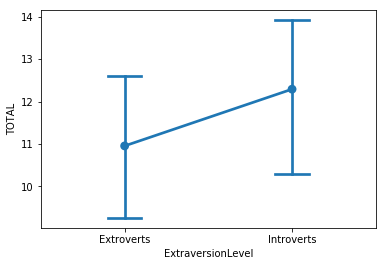

In [27]:
 sns.pointplot(x="ExtraversionLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Extrovert_Accidents.pdf')

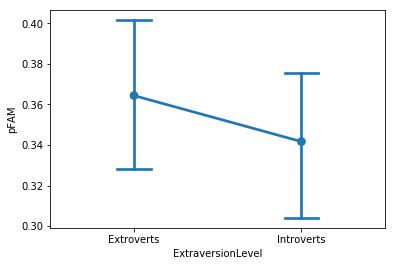

In [28]:
 sns.pointplot(x="ExtraversionLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Extrovert_propAccidents_Familiar.pdf')

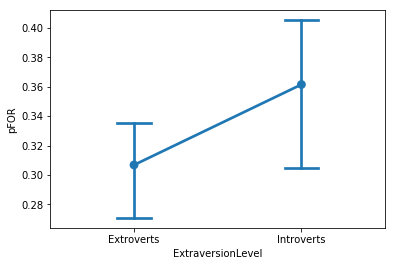

In [29]:
 sns.pointplot(x="ExtraversionLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Extrovert_propAccidents_Foreign.pdf')

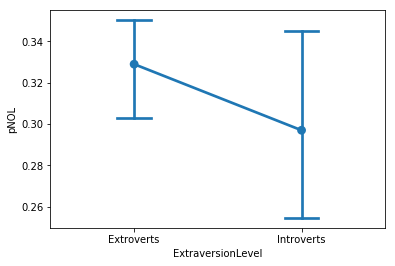

In [30]:
 sns.pointplot(x="ExtraversionLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Extrovert_propAccidents_NoLyrics.pdf')

In [31]:
conditions = [
                  (data['Openness'] >= 50),
                  (data['Openness'] < 50)
]
choices = ['Liberal','Traditional']
data['OpennessLevel'] = np.select(conditions, choices, default=None)
data['OpennessLevel'].value_counts()

Liberal        18
Traditional    12
Name: OpennessLevel, dtype: int64

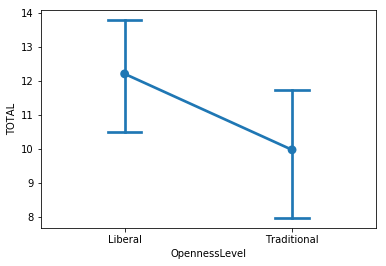

In [32]:
 sns.pointplot(x="OpennessLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Openness_Accidents.pdf')

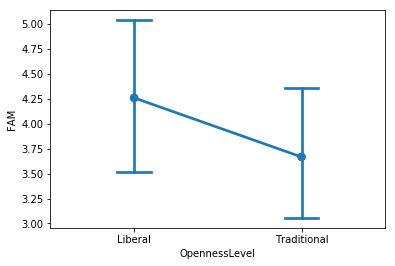

In [33]:
 sns.pointplot(x="OpennessLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Openness_propAccidents_Familiar.pdf')

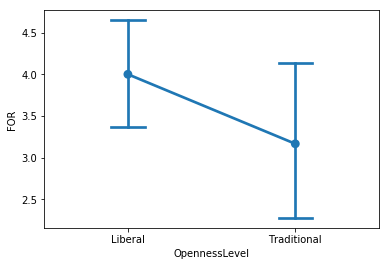

In [34]:
 sns.pointplot(x="OpennessLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Openness_propAccidents_Foreign.pdf')

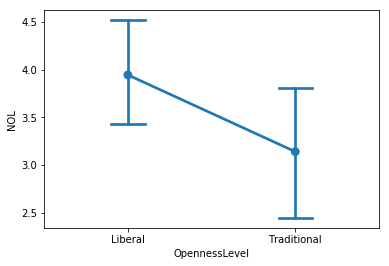

In [35]:
 sns.pointplot(x="OpennessLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Openness_propAccidents_NoLyrics.pdf')

In [36]:
conditions = [
                  (data['Conscientiousness'] >= 50),
                  (data['Conscientiousness'] < 50)
]
choices = ['Impulsive','Organized']
data['ConscientiousnessLevel'] = np.select(conditions, choices, default=None)
data['ConscientiousnessLevel'].value_counts()

Impulsive    19
Organized    11
Name: ConscientiousnessLevel, dtype: int64

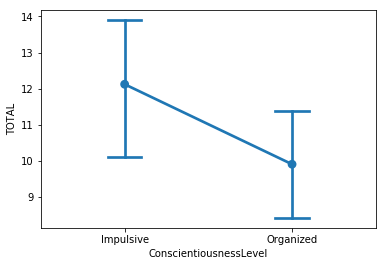

In [37]:
 sns.pointplot(x="ConscientiousnessLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Conscientiousness_Accidents.pdf')

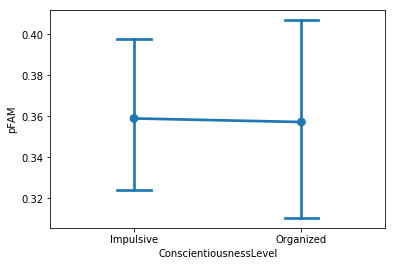

In [38]:
 sns.pointplot(x="ConscientiousnessLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Conscientiousness_propAccidents_Familiar.pdf')

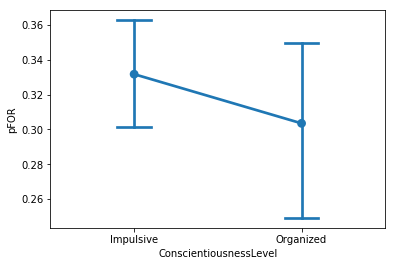

In [39]:
 sns.pointplot(x="ConscientiousnessLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Conscientiousness_propAccidents_Foreign.pdf')

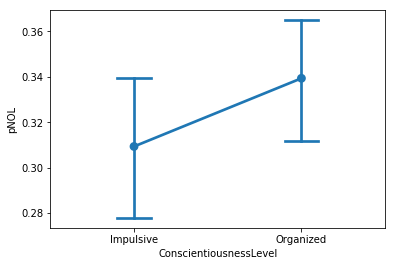

In [40]:
 sns.pointplot(x="ConscientiousnessLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Conscientiousness_propAccidents_NoLyrics.pdf')

In [41]:
conditions = [
                  (data['Agreeableness'] >= 50),
                  (data['Agreeableness'] < 50)
]
choices = ['Competitive','Team worker']
data['AgreeablenessLevel'] = np.select(conditions, choices, default=None)
data['AgreeablenessLevel'].value_counts()

Competitive    20
Team worker    10
Name: AgreeablenessLevel, dtype: int64

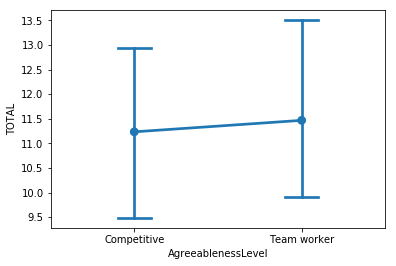

In [42]:
 sns.pointplot(x="AgreeablenessLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Agreeableness_Accidents.pdf')

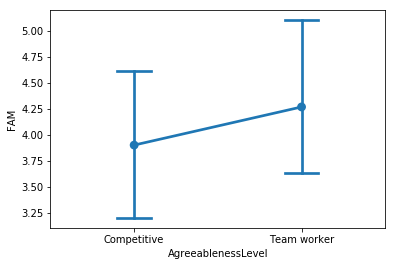

In [43]:
 sns.pointplot(x="AgreeablenessLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Agreeableness_propAccidents_Familiar.pdf')

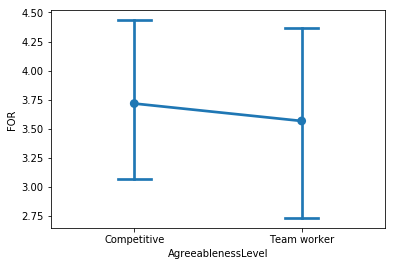

In [44]:
 sns.pointplot(x="AgreeablenessLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Agreeableness_propAccidents_Foreign.pdf')

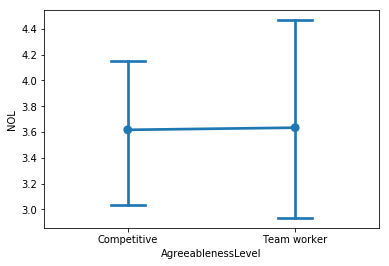

In [45]:
 sns.pointplot(x="AgreeablenessLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Agreeableness_propAccidents_NoLyrics.pdf')

In [46]:
conditions = [
                  (data['Neuroticism'] >= 50),
                  (data['Neuroticism'] < 50)
]
choices = ['Emotional','Relaxed']
data['NeuroticismLevel'] = np.select(conditions, choices, default=None)
data['NeuroticismLevel'].value_counts()

Emotional    25
Relaxed       5
Name: NeuroticismLevel, dtype: int64

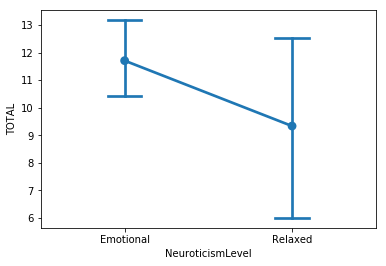

In [47]:
 sns.pointplot(x="NeuroticismLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Neuroticism_Accidents.pdf')

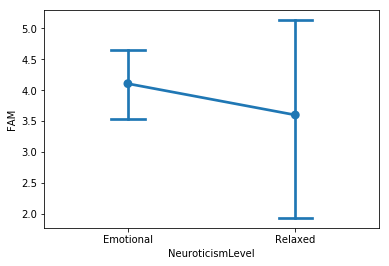

In [48]:
 sns.pointplot(x="NeuroticismLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Neuroticism_propAccidents_Familiar.pdf')

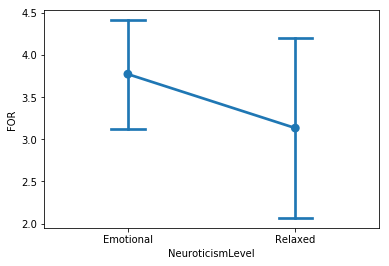

In [49]:
 sns.pointplot(x="NeuroticismLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Neuroticism_propAccidents_Foreign.pdf')

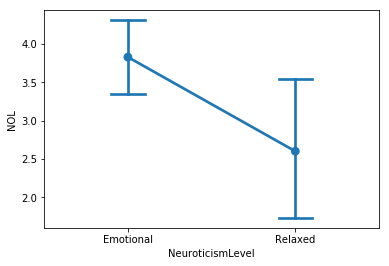

In [50]:
 sns.pointplot(x="NeuroticismLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Neuroticism_propAccidents_NoLyrics.pdf')

## Part 3: Music sophistication 

In [51]:
data01

,Mother tongue,NoLyricsLike,ForeignLike,FamiliarLike,ActiveEngagement,PerceptualAbilities,MusicalTraining,SingingAbilities,Emotions,MusicSoph,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Timestamp,,,,,,,,,,,,,,,
0,French,1,1,1,51,52,29,12,41,67,79,92,79,76,66
1,French,6,4,4,56,58,45,41,33,111,44,38,85,42,79
2,Spanish,4,1,7,37,43,24,31,31,79,34,79,85,69,24
3,Persian,2,1,5,36,53,27,42,27,86,62,85,66,76,50
4,Spanish,5,7,3,45,38,18,32,39,83,73,95,79,60,79
5,French,5,3,5,50,53,25,26,35,71,46,73,66,52,85
6,French,4,5,3,46,55,34,32,36,91,28,73,73,85,16
7,French,2,5,6,51,54,39,32,37,96,52,24,79,60,16
8,French,5,4,5,55,55,40,35,41,102,66,34,88,85,52


In [52]:
conditions = [
                  (data['ActiveEngagement'] >= 41.52),
                  (data['ActiveEngagement'] < 41.52)
]
choices = ['High Active Engagement','Low Active Engagement']
data['ActiveEngagementLevel'] = np.select(conditions, choices, default=None)
data['ActiveEngagementLevel'].value_counts()

Low Active Engagement     17
High Active Engagement    13
Name: ActiveEngagementLevel, dtype: int64

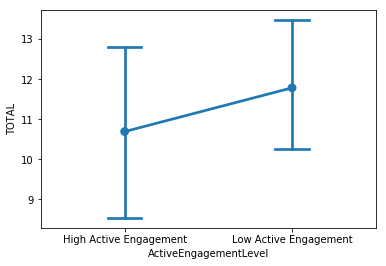

In [53]:
 sns.pointplot(x="ActiveEngagementLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('ActiveEngagement_propAccidents.pdf')

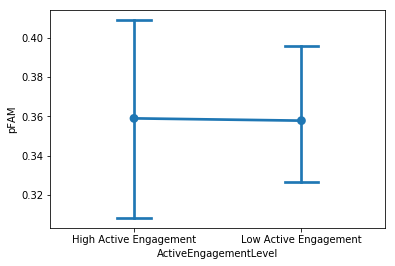

In [54]:
 sns.pointplot(x="ActiveEngagementLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('ActiveEngagement_propAccidents_Familiar.pdf')

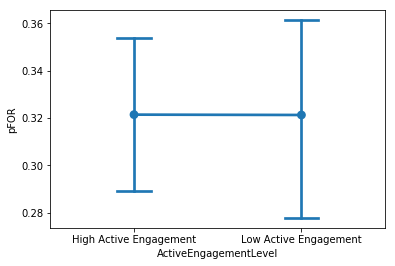

In [55]:
 sns.pointplot(x="ActiveEngagementLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('ActiveEngagement_propAccidents_Foreign.pdf')

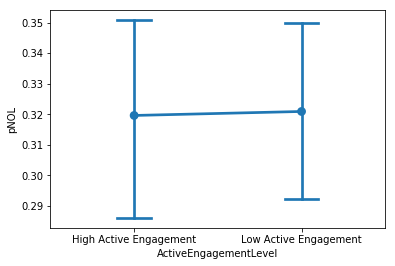

In [56]:
 sns.pointplot(x="ActiveEngagementLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('ActiveEngagement_propAccidents_NoLyrics.pdf')

In [57]:
conditions = [
                  (data['PerceptualAbilities'] >= 50.20),
                  (data['PerceptualAbilities'] < 50.20)
]
choices = ['High Perceptual Abilities','Low Perceptual Abilities']
data['PerceptualAbilitiesLevel'] = np.select(conditions, choices, default=None)
data['PerceptualAbilitiesLevel'].value_counts()

Low Perceptual Abilities     18
High Perceptual Abilities    12
Name: PerceptualAbilitiesLevel, dtype: int64

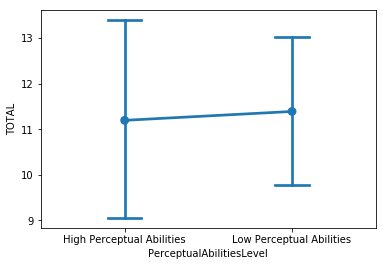

In [58]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_Accidents.pdf')

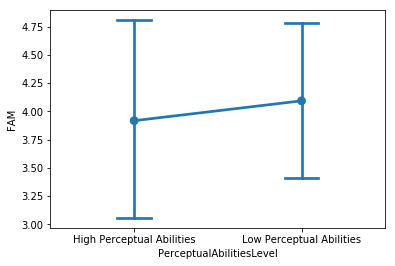

In [59]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_propAccidents_Familiar.pdf')

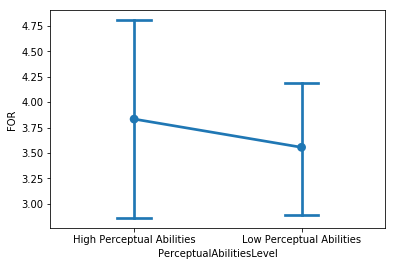

In [60]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_propAccidents_Foreign.pdf')

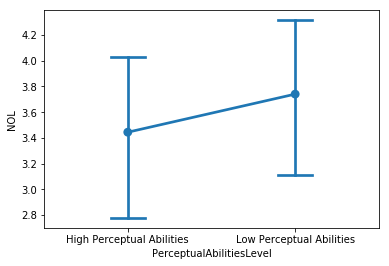

In [61]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_propAccidents_NoLyrics.pdf')

In [62]:
conditions = [
                  (data['MusicalTraining'] >= 26.52),
                  (data['MusicalTraining'] < 26.52)
]
choices = ['High Musical Training','Low Musical Training']
data['MusicalTrainingLevel'] = np.select(conditions, choices, default=None)
data['MusicalTrainingLevel'].value_counts()

Low Musical Training     20
High Musical Training    10
Name: MusicalTrainingLevel, dtype: int64

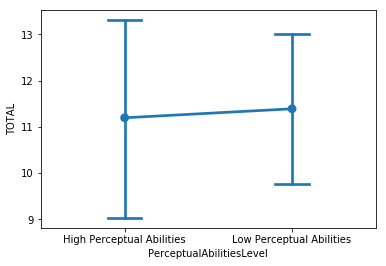

In [63]:
 sns.pointplot(x="PerceptualAbilitiesLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('PerceptualAbilities_Accidents.pdf')

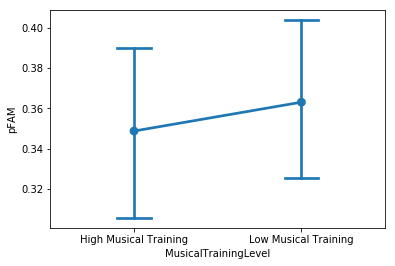

In [64]:
 sns.pointplot(x="MusicalTrainingLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicalTraining_propAccidents_Familiar.pdf')

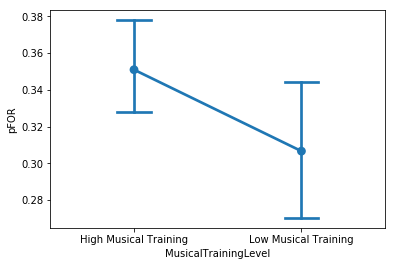

In [65]:
 sns.pointplot(x="MusicalTrainingLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicalTraining_propAccidents_Foreign.pdf')

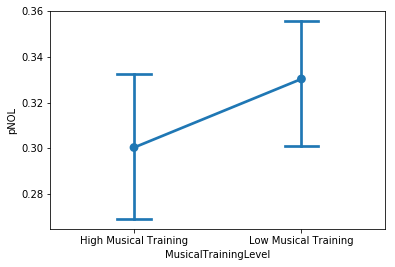

In [66]:
sns.pointplot(x="MusicalTrainingLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicalTraining_propAccidents_NoLyrics.pdf')

In [67]:
conditions = [
                  (data['SingingAbilities'] >= 31.67),
                  (data['SingingAbilities'] < 31.67)
]
choices = ['High Singing Abilities','Low Singing Abilities']
data['SingingAbilitiesLevel'] = np.select(conditions, choices, default=None)
data['SingingAbilitiesLevel'].value_counts()

Low Singing Abilities     17
High Singing Abilities    13
Name: SingingAbilitiesLevel, dtype: int64

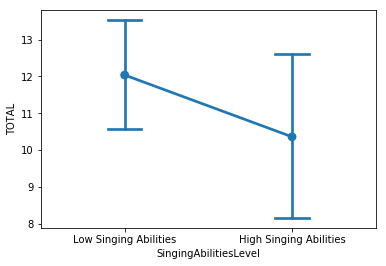

In [68]:
 sns.pointplot(x="SingingAbilitiesLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('SingingAbilities_Accidents.pdf')

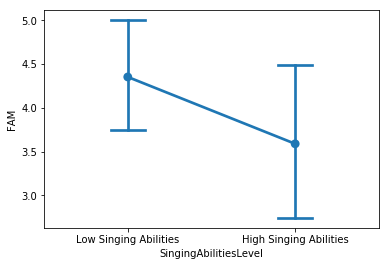

In [69]:
 sns.pointplot(x="SingingAbilitiesLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('SingingAbilities_propAccidents_Familiar.pdf')

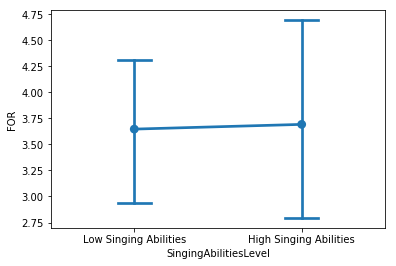

In [70]:
 sns.pointplot(x="SingingAbilitiesLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('SingingAbilities_propAccidents_Foreign.pdf')

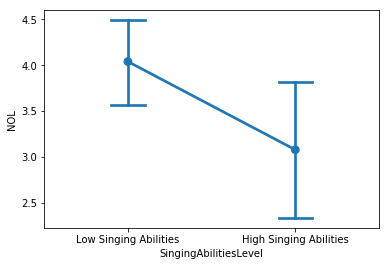

In [71]:
 sns.pointplot(x="SingingAbilitiesLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('SingingAbilities_propAccidents_NoLyrics.pdf')

In [72]:
conditions = [
                  (data['Emotions'] >= 34.66),
                  (data['Emotions'] < 34.66)
]
choices = ['High Emotion','Low Emotion']
data['EmotionsLevel'] = np.select(conditions, choices, default=None)
data['EmotionsLevel'].value_counts()

Low Emotion     15
High Emotion    15
Name: EmotionsLevel, dtype: int64

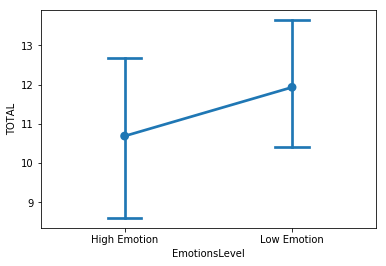

In [73]:
 sns.pointplot(x="EmotionsLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Emotions_propAccidents.pdf')

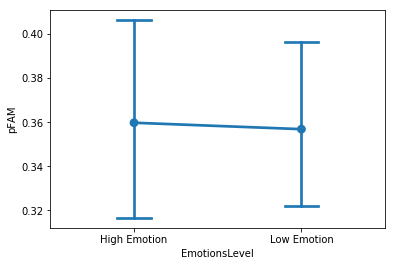

In [74]:
 sns.pointplot(x="EmotionsLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Emotions_propAccidents_Familiar.pdf')

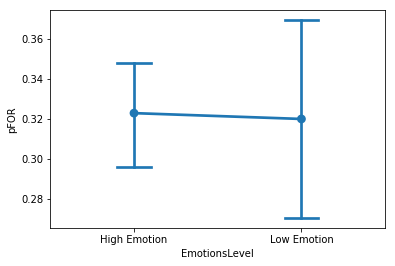

In [75]:
 sns.pointplot(x="EmotionsLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Emotions_propAccidents_Foreign.pdf')

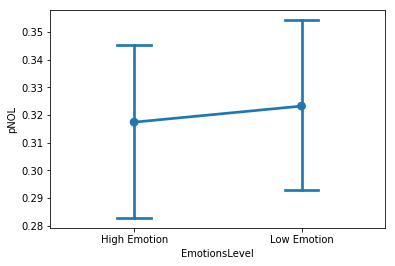

In [76]:
 sns.pointplot(x="EmotionsLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('Emotions_propAccidents_NOL.pdf')

In [77]:
conditions = [
                  (data['MusicSoph'] >= 81.58),
                  (data['MusicSoph'] < 81.58)
]
choices = ['High Musical Sophistication','Low Musical Sophistication']
data['MusicSophLevel'] = np.select(conditions, choices, default=None)
data['MusicSophLevel'].value_counts()

Low Musical Sophistication     22
High Musical Sophistication     8
Name: MusicSophLevel, dtype: int64

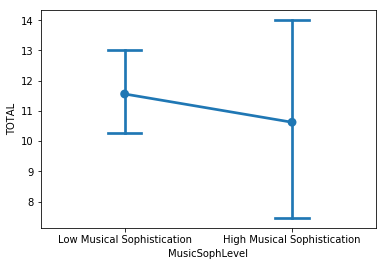

In [78]:
 sns.pointplot(x="MusicSophLevel", y="TOTAL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicSoph_Accidents.pdf')

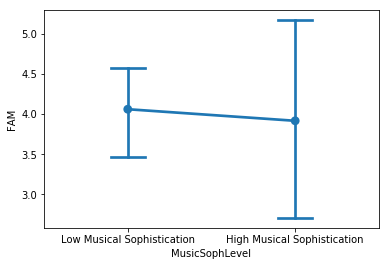

In [79]:
 sns.pointplot(x="MusicSophLevel", y="pFAM",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicSoph_Accidents_propFamiliar.pdf')

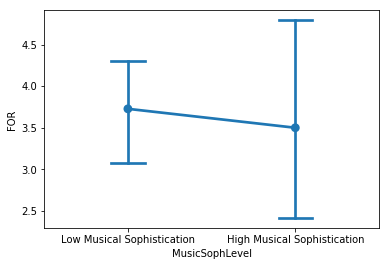

In [80]:
 sns.pointplot(x="MusicSophLevel", y="pFOR",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicSoph_Accidents_propForeign.pdf')

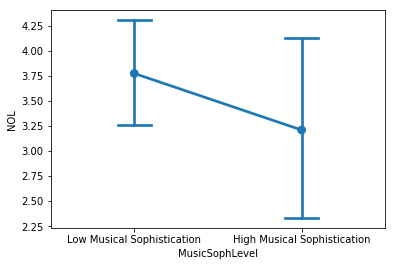

In [81]:
 sns.pointplot(x="MusicSophLevel", y="pNOL",
              data=data,
              markers=["o", "x"],
              linestyles=["-", "--"],
              capsize=.2,
              ci=95)
plt.savefig('MusicSoph_Accidents_propNoLyrics.pdf')

In [85]:
data.to_csv('out.csv')

## Interaction effects

In [ ]:
prop_Accidents = pd.concat((data['pNOL'], data['pFAM'],data['pFOR']), axis=0)
prop_Accidents = pd.DataFrame(prop_Accidents, columns=['Accidents'])
data['NoLyrics']='No Lyrics'
data['Familiar']='Familiar'
data['Foreign']='Foreign'
style_Song = pd.concat((data['NoLyrics'], data['Familiar'], data['Foreign']), axis=0)
style_Song = pd.DataFrame(style_Song, columns=['Style'])
style_Song

In [120]:
music_soph = pd.concat((data['MusicSophLevel'],data['MusicSophLevel'],data['MusicSophLevel']), axis=0)
music_soph
music_sophistication = pd.concat((prop_Accidents,style_Song,music_soph), axis=1)
music_sophistication
music_sophistication = pd.DataFrame(music_sophistication)

,Accidents,Style,MusicSophLevel
Timestamp,,,
0,0.325581,No Lyrics,Low Musical Sophistication
1,0.354839,No Lyrics,High Musical Sophistication
2,0.285714,No Lyrics,Low Musical Sophistication
3,0.222222,No Lyrics,High Musical Sophistication
4,0.354167,No Lyrics,High Musical Sophistication
5,0.333333,No Lyrics,Low Musical Sophistication
6,0.250000,No Lyrics,High Musical Sophistication
7,0.384615,No Lyrics,High Musical Sophistication
8,0.325000,No Lyrics,High Musical Sophistication


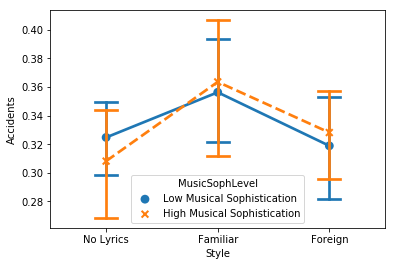

In [150]:
sns.pointplot(x="Style", y="Accidents", hue="MusicSophLevel",
data=music_sophistication,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_MusicSoph.jpg')

In [125]:
emotions = pd.concat((data['EmotionsLevel'],data['EmotionsLevel'],data['EmotionsLevel']), axis=0)
emotions
music_emotions = pd.concat((prop_Accidents,style_Song,emotions), axis=1)
music_emotions
music_emotions = pd.DataFrame(music_emotions)

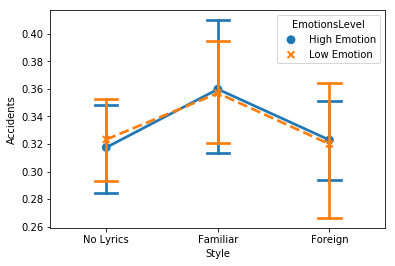

In [151]:
sns.pointplot(x="Style", y="Accidents", hue="EmotionsLevel",
data=music_emotions,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_Emotions.jpg')

In [129]:
singing = pd.concat((data['SingingAbilitiesLevel'],data['SingingAbilitiesLevel'],data['SingingAbilitiesLevel']), axis=0)
singing
singing_abilities = pd.concat((prop_Accidents,style_Song,singing), axis=1)
singing_abilities
singing_abilities = pd.DataFrame(singing_abilities)

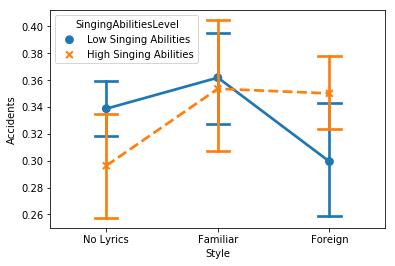

In [152]:
sns.pointplot(x="Style", y="Accidents", hue="SingingAbilitiesLevel",
data=singing_abilities,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_SingingAbilities.jpg')

In [132]:
training = pd.concat((data['MusicalTrainingLevel'],data['MusicalTrainingLevel'],data['MusicalTrainingLevel']), axis=0)
training
training_abilities = pd.concat((prop_Accidents,style_Song,training), axis=1)
training_abilities
training_abilities = pd.DataFrame(training_abilities)

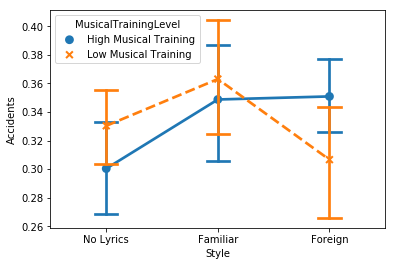

In [153]:
sns.pointplot(x="Style", y="Accidents", hue="MusicalTrainingLevel",
data=training_abilities,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_MusicalTrainingAbilities.jpg')

In [135]:
perceptual = pd.concat((data['PerceptualAbilitiesLevel'],data['PerceptualAbilitiesLevel'],data['PerceptualAbilitiesLevel']), axis=0)
perceptual
perceptual_abilities = pd.concat((prop_Accidents,style_Song,perceptual), axis=1)
perceptual_abilities
perceptual_abilities = pd.DataFrame(perceptual_abilities)

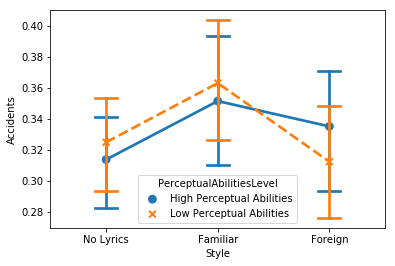

In [154]:
sns.pointplot(x="Style", y="Accidents", hue="PerceptualAbilitiesLevel",
data=perceptual_abilities,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_PerceptualAbilitiesAbilities.jpg')

In [137]:
engagement = pd.concat((data['ActiveEngagementLevel'],data['ActiveEngagementLevel'],data['ActiveEngagementLevel']), axis=0)
engagement
active_engagement = pd.concat((prop_Accidents,style_Song,engagement), axis=1)
active_engagement 
active_engagement = pd.DataFrame(active_engagement)

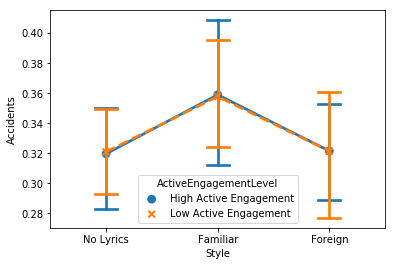

In [155]:
sns.pointplot(x="Style", y="Accidents", hue="ActiveEngagementLevel",
data=active_engagement,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_ActiveEngagement.jpg')

In [142]:
openness = pd.concat((data['OpennessLevel'],data['OpennessLevel'],data['OpennessLevel']), axis=0)
openness
Openness = pd.concat((prop_Accidents,style_Song,openness), axis=1)
Openness
Openness = pd.DataFrame(Openness)

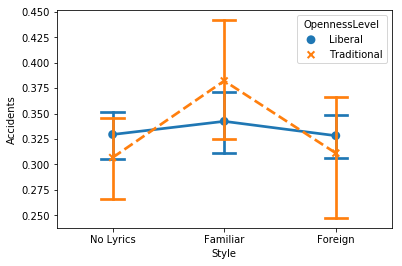

In [156]:
sns.pointplot(x="Style", y="Accidents", hue="OpennessLevel",
data=Openness,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_Openness.jpg')

In [144]:
conscientiousness = pd.concat((data['ConscientiousnessLevel'],data['ConscientiousnessLevel'],data['ConscientiousnessLevel']), axis=0)
conscientiousness
Conscientiousness = pd.concat((prop_Accidents,style_Song,conscientiousness), axis=1)
Conscientiousness
Conscientiousness = pd.DataFrame(Conscientiousness)

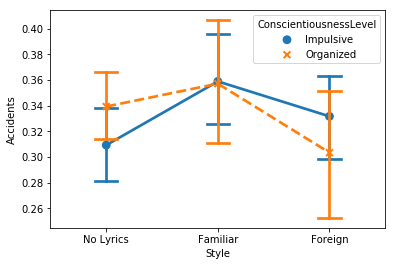

In [157]:
sns.pointplot(x="Style", y="Accidents", hue="ConscientiousnessLevel",
data=Conscientiousness,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_Conscientiousness.jpg')

In [147]:
extraversion = pd.concat((data['ExtraversionLevel'],data['ExtraversionLevel'],data['ExtraversionLevel']), axis=0)
extraversion
Extraversion = pd.concat((prop_Accidents,style_Song,extraversion), axis=1)
Extraversion
Extraversion = pd.DataFrame(Extraversion)

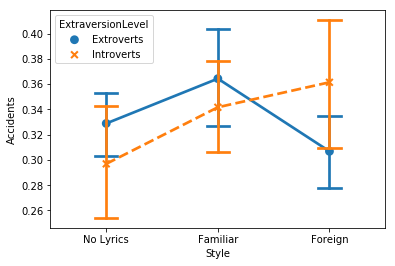

In [158]:
sns.pointplot(x="Style", y="Accidents", hue="ExtraversionLevel",
data=Extraversion,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_Extraversion.jpg')

In [159]:
agreeableness = pd.concat((data['AgreeablenessLevel'],data['AgreeablenessLevel'],data['AgreeablenessLevel']), axis=0)
agreeableness
Agreeableness = pd.concat((prop_Accidents,style_Song,agreeableness), axis=1)
Agreeableness
Agreeableness = pd.DataFrame(Agreeableness)

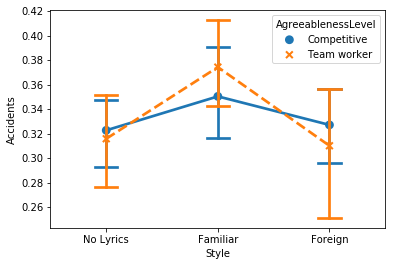

In [161]:
sns.pointplot(x="Style", y="Accidents", hue="AgreeablenessLevel",
data=Agreeableness,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_Agreeableness.jpg')

In [163]:
neuroticism = pd.concat((data['NeuroticismLevel'],data['NeuroticismLevel'],data['NeuroticismLevel']), axis=0)
neuroticism
Neuroticism = pd.concat((prop_Accidents,style_Song,neuroticism), axis=1)
Neuroticism
Neuroticism = pd.DataFrame(Neuroticism)

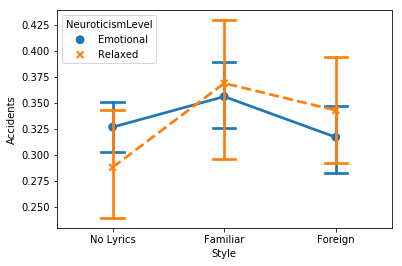

In [164]:
sns.pointplot(x="Style", y="Accidents", hue="NeuroticismLevel",
data=Neuroticism,
markers=["o", "x"],
linestyles=["-", "--"],
capsize=.2,
ci=95)
plt.savefig('Style_Accidents_Neuroticism.jpg')

In [141]:
data01

,Mother tongue,NoLyricsLike,ForeignLike,FamiliarLike,ActiveEngagement,PerceptualAbilities,MusicalTraining,SingingAbilities,Emotions,MusicSoph,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Timestamp,,,,,,,,,,,,,,,
0,French,1,1,1,51,52,29,12,41,67,79,92,79,76,66
1,French,6,4,4,56,58,45,41,33,111,44,38,85,42,79
2,Spanish,4,1,7,37,43,24,31,31,79,34,79,85,69,24
3,Persian,2,1,5,36,53,27,42,27,86,62,85,66,76,50
4,Spanish,5,7,3,45,38,18,32,39,83,73,95,79,60,79
5,French,5,3,5,50,53,25,26,35,71,46,73,66,52,85
6,French,4,5,3,46,55,34,32,36,91,28,73,73,85,16
7,French,2,5,6,51,54,39,32,37,96,52,24,79,60,16
8,French,5,4,5,55,55,40,35,41,102,66,34,88,85,52
